In [218]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split


In [219]:
# Import data set
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [220]:
company = pd.get_dummies(company,columns=["Urban","US","ShelveLoc"],drop_first=True)
company

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


In [221]:
company.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Urban_Yes             uint8
US_Yes                uint8
ShelveLoc_Good        uint8
ShelveLoc_Medium      uint8
dtype: object

In [222]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   Urban_Yes         400 non-null    uint8  
 9   US_Yes            400 non-null    uint8  
 10  ShelveLoc_Good    400 non-null    uint8  
 11  ShelveLoc_Medium  400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(4)
memory usage: 26.7 KB


In [223]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000,0.212500,0.547500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113,0.409589,0.498362
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000,0.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
# Convert numerical into Categorical

company['Sales_category']=pd.cut(company['Sales'],
    bins=[company['Sales'].min(), 5.4, 9.32, company['Sales'].max()],
    labels=['Low', 'Medium', 'High'])

In [225]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium,Sales_category
0,9.50,138,73,11,276,120,42,17,1,1,0,0,High
1,11.22,111,48,16,260,83,65,10,1,1,1,0,High
2,10.06,113,35,10,269,80,59,12,1,1,0,1,High
3,7.40,117,100,4,466,97,55,14,1,1,0,1,Medium
4,4.15,141,64,3,340,128,38,13,1,0,0,0,Low


In [226]:
company.Sales_category.value_counts()

Medium    200
Low       100
High       99
Name: Sales_category, dtype: int64

In [227]:
label_encoder = preprocessing.LabelEncoder()
company['Sales_category']=label_encoder.fit_transform(company['Sales_category'])
company['Sales_category']

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales_category, Length: 400, dtype: int32

In [228]:
company.Sales_category.value_counts()

2    200
1    100
0     99
3      1
Name: Sales_category, dtype: int64

In [229]:
company.Sales_category.value_counts()

2    200
1    100
0     99
3      1
Name: Sales_category, dtype: int64

In [230]:
x=company.iloc[:,0:6]
y=company['Sales_category']

In [231]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [232]:
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    0
Name: Sales_category, Length: 400, dtype: int32

In [233]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Sales_category']

In [234]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [235]:
from sklearn.tree import DecisionTreeClassifier

In [236]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [237]:
from sklearn import tree

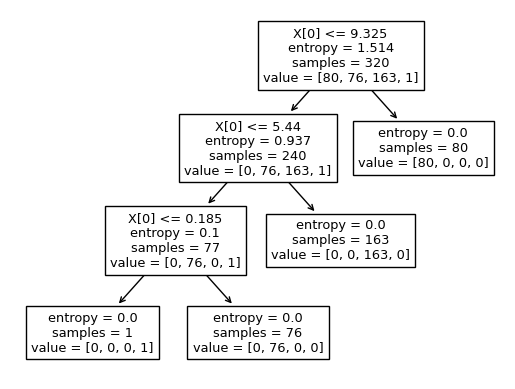

In [238]:
#PLot the decision tree
tree.plot_tree(model);

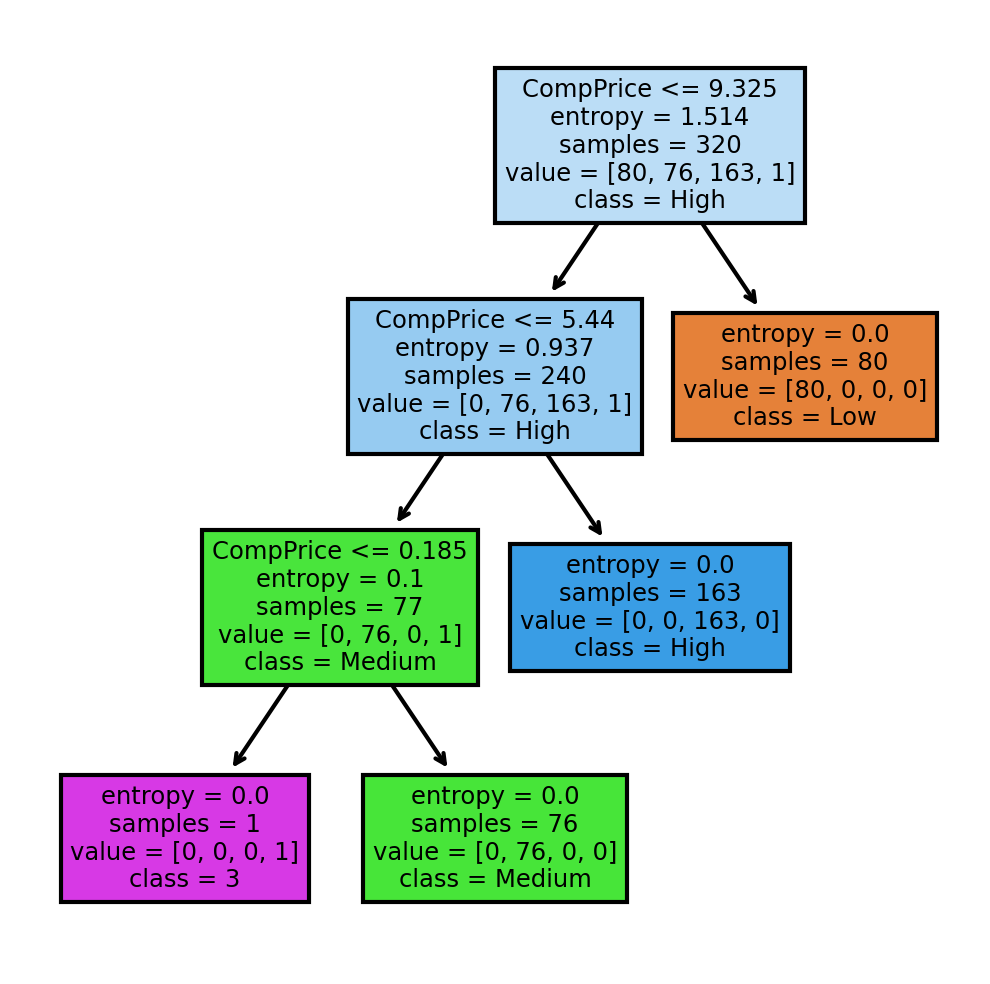

In [239]:
fn=['CompPrice','Income','Advertising','Population','Price']
cn=['Low', 'Medium', 'High','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [240]:
# to build as text format
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_0 <= 9.32
|   |--- feature_0 <= 5.44
|   |   |--- feature_0 <= 0.19
|   |   |   |--- class: 3
|   |   |--- feature_0 >  0.19
|   |   |   |--- class: 1
|   |--- feature_0 >  5.44
|   |   |--- class: 2
|--- feature_0 >  9.32
|   |--- class: 0



In [241]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    36
1    24
0    19
3     1
dtype: int64

In [242]:
preds

array([0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 3, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

In [243]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong p

col_0,0,1,2,3
Sales_category,,,,
0,19,0,0,0
1,0,23,0,1
2,0,1,36,0


In [244]:
# Accuracy 
np.mean(preds==y_test)

0.975

# Building Decision Tree Classifier (CART) using Gini Criteria  



 # from sklearn.tree import DecisionTreeClas

   

In [245]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [246]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [247]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.975

# Decision Tree Regression Example

In [248]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [249]:
array = company.values
X = array[:,0:3]
y = array[:,3]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [251]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [252]:
#Find the accuracy
model.score(X_test,y_test)

-1.227299122833828